# Import Libraries & Data

In [1]:
# Initial imports
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

from pathlib import Path
from datetime import date, timedelta
from pandas.plotting import register_matplotlib_converters

In [2]:
# Read data 
hotel_path = Path('Data/hotel_bookings.csv')
hotel = pd.read_csv(hotel_path, infer_datetime_format=True, parse_dates=True)
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Feature Defenition:

- hotel: Hotel (H1 = Resort Hotel or H2 = City Hotel)
- is_canceled: Value indicating if the booking was canceled (1) or not (0)
- lead_time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year: Year of arrival date
- arrival_date_month: Month of arrival date
- arrival_date_week_number: Week number of year for arrival date
- stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults: Number of adults
- children: Number of children
- babies: Number of babies
- meal: Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal
- Country: Country of origin. Categories are represented in the ISO 3155–3:2013 format
- market_segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution_channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled: Number of previous bookings not cancelled by the customer prior to the current booking
- reserved_room_type: Code of room type reserved. Code is presented instead of designation for anonymity reasons.
- assigned_room_type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type.
- booking_changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS
- deposit_type: Indication on if the customer made a deposit to guarantee the booking
- agent: ID of the travel agency that made the booking
- company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for
- days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type: Type of booking
- adr: Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces: Number of car parking spaces required by the customer
- total_of_special_requests: Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status: Reservation last status
- reservation_status_date: Date at which the last status was set

# Data Cleaning and Prep

In [3]:
# Review the shape of the data import
hotel.shape

(119390, 32)

In [4]:
# Check for null values
hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
# Now we will address the null values outlined above

# For the following, features, we will fill null data with a unique value
hotel["country"] = hotel["country"].fillna('Unknown')
hotel["agent"] = hotel["agent"].fillna(0)
hotel["children"] = hotel["children"].fillna(0)

# For the "company" feature, given it is essentially irrelevant (almost entirely null), we will remove the column
hotel.drop(columns=['company'], inplace=True)

In [6]:
# Next, run a check for duplicates
hotel.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [7]:
# Verify that the nulls from above have been addressed
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

# 3.) Preliminary Analysis of Data

In [8]:
# Generate summary statistics 
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


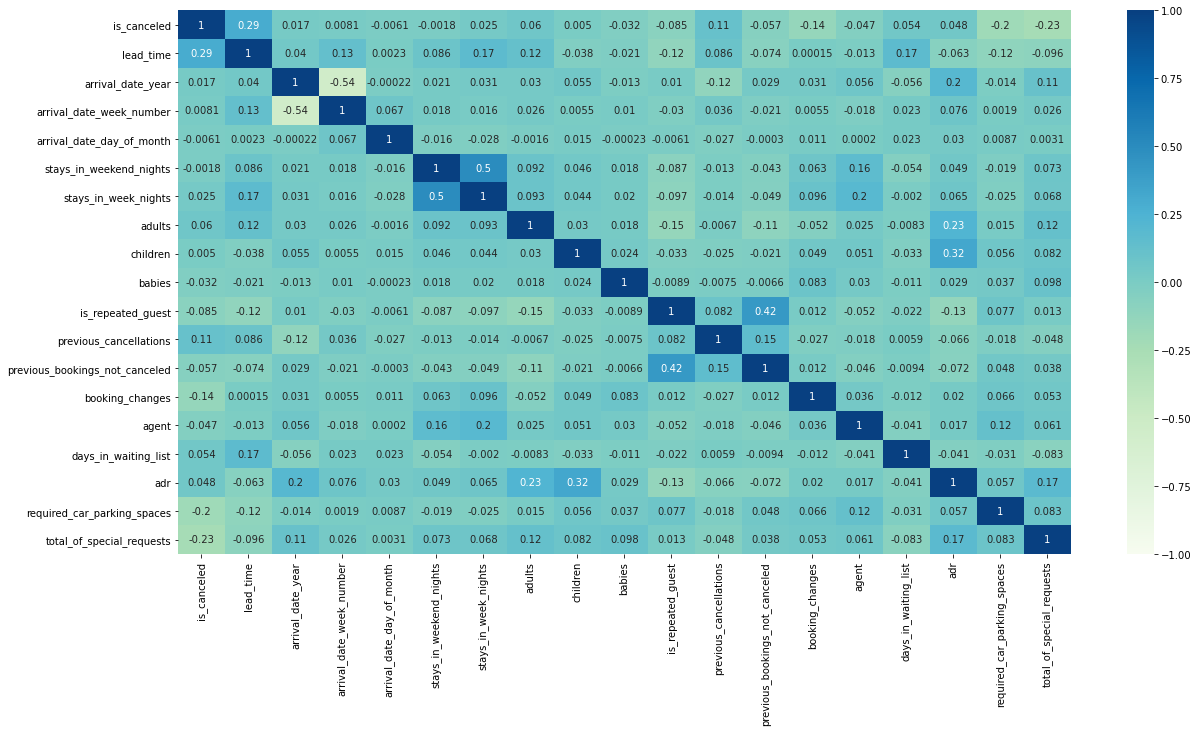

In [9]:
# Identify and plot correlation via heatmap, some features that are highly coorelated can be removed
correlation = hotel.corr()
plt.figure(figsize = (20,10))
hotel_corr = sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="GnBu").get_figure()

In [36]:
hotel.dtypes

hotel                             int32
is_canceled                       int64
lead_time                         int64
arrival_date_year                 int64
arrival_date_month                int32
arrival_date_week_number          int64
arrival_date_day_of_month         int64
stays_in_weekend_nights           int64
stays_in_week_nights              int64
adults                            int64
children                          int64
babies                            int64
meal                              int32
country                           int32
market_segment                    int32
distribution_channel              int32
is_repeated_guest                 int64
previous_cancellations            int64
previous_bookings_not_canceled    int64
reserved_room_type                int32
assigned_room_type                int32
booking_changes                   int64
deposit_type                      int32
agent                             int64
days_in_waiting_list              int64


In [40]:
hotel.reset_index(inplace = True)

In [41]:
hotel.head()

,index,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,0,1,0,342,2015,5,27,1,0,0,...,2,2,3,0,0,0,2,0,0,0
1,1,1,0,737,2015,5,27,1,0,0,...,2,2,4,0,0,0,2,0,0,0
2,2,1,0,7,2015,5,27,1,0,1,...,0,2,0,0,0,0,2,75,0,0
3,3,1,0,13,2015,5,27,1,0,1,...,0,0,0,0,304,0,2,75,0,0
4,4,1,0,14,2015,5,27,1,0,2,...,0,0,0,0,240,0,2,98,0,1


In [42]:
def get_categorical_rate_df(df, var_name):
    """
    Given a dataframe and a variable name to specify a column in that dataframe, it will return a new dataframe
    with number of scans for each of the values of the variable name as well as percentage over total.
    """
    col_name = df.groupby([var_name]).count().columns[0]

    temp_df = df.groupby([var_name])[[col_name]].count()
    temp_df['total_scans'] = temp_df[col_name].sum()
    temp_df['pct_over_total'] = temp_df[col_name] / temp_df['total_scans']

    temp_df.rename(columns={temp_df.columns[0]: "num_entries"}, inplace=True)

    # col_names = list(temp_df.columns)
    # col_names[0] = 'num_entries'
    # temp_df.columns = col_names

    return temp_df

def get_important_fields_df(df, var_name, threshold=100):
    """
    Given a dataframe and a variable name corresponding to a column name, it returns a subset of the dataframe
    where each of the entries belong to a popular variable that occurs more than `threshold` times.
    """

    temp_df = df.groupby([var_name])[['index']].count()
    temp_df2 = temp_df[temp_df['index'] > threshold]

    main_values = list(temp_df2.index)

    return df[df[var_name].isin(main_values)]

def get_correlation_df(df, var_name, target_var='fraud', min_correlation=0.05):
    """
    Calculates the correlation between a specific the values of a specific column name in a dataframe and the
    target_var such as 'fraud'. It outputs only the values that have a correlation higher than `min_correlation`.
    """

    df2 = pd.get_dummies(df[[var_name, target_var]], columns=[var_name])

    # x_labels = []
    # labels = list(df2.columns[1:])

    # for i in range(0, len(labels)):
    #     x_labels.append(labels[i].split('_')[-1])

    df3 = df2.corrwith(df2[target_var])[1:].to_frame()
    df3.columns = ['Correlation with {}'.format(target_var)]

    df3 = df3[np.abs(df3['Correlation with {}'.format(target_var)]) > min_correlation]
    df3['var_name'] = var_name

    values = list(df3.index)

    df3['values'] = [value.replace(var_name + "_", "") for value in values]

    return df3

def get_most_important_variables(df, potential_important_vars, threshold_count=100, min_correlation=0.08,
                                 target_var='fraud'):
    """
    Inputs:
    * Base Dataframe
    * List with potential_important_vars

    Output:
    * A dataframe showing the correlation of each of the values from potential_important_vars
    with fraud (target_var) above a threshold (min_correlation) and
    making sure that that value shows up at least X times (threshold_count).
        * Index of output is the value, i.e. country_VNM
        * Columns are `Correlation with fraud`, `var_name`, and `values`.

    Dependent functions:
    * get_important_fields_df()
    * get_correlation_df()
    """
    var_name = potential_important_vars[0]
    temp_df = get_important_fields_df(df, var_name, threshold=threshold_count)

    high_corr_df = get_correlation_df(temp_df, var_name, target_var=target_var,
                                           min_correlation=min_correlation)

    for i in range(1, len(potential_important_vars)):
        var_name = potential_important_vars[i]
        reduced_df = get_important_fields_df(df, var_name, threshold=threshold_count)
        high_corr_temp_df = get_correlation_df(reduced_df, var_name, target_var=target_var,
                                                    min_correlation=min_correlation)
        high_corr_df = high_corr_df.append(high_corr_temp_df)
        print(var_name)
        print(high_corr_temp_df)

    return high_corr_df

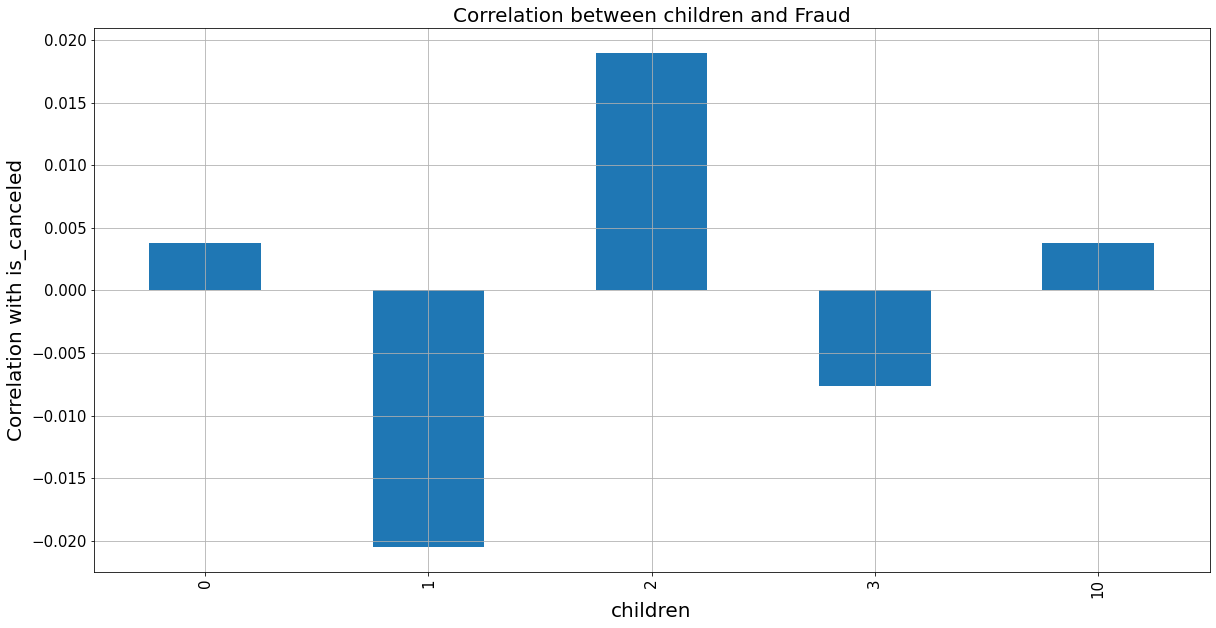

In [49]:
def plot_correlation(df, var_name):
    target_var = 'is_canceled'
    df2 = pd.get_dummies(df[[var_name, target_var]], columns=[var_name])
    x_labels = []
    labels = list(df2.columns[1:])
    for i in range(0,len(labels)):
        x_labels.append(labels[i].split('_')[-1])

    df3 = df2.corrwith(df2[target_var])[1:]
    df3.index = x_labels

    df3.plot.bar(
            figsize = (20, 10), title = "Correlation with {}".format(var_name), fontsize = 15, grid = True)
    plt.title("Correlation between {} and Fraud".format(var_name), fontsize=20)
    plt.xlabel(var_name, fontsize=20)
    plt.ylabel("Correlation with {}".format(target_var), fontsize=20)
    
plot_correlation(hotel, 'children')

In [ ]:
get_most_important_variables(

In [10]:
# Dropped the "reservation_status_date" column and the "reservation_status" column because the correlation map sees them as too highly correlated and aren't shown
# Keep "hotel" because we of course need the hotel type to be in the dataframe

hotel.drop(columns=['reservation_status_date', 'reservation_status'], inplace=True)

# Verify the dropped column
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1


In [11]:
# Review data types to see if we need to make alterations for modelling
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
# Categorical data assignment needs to be used on non-numerical data types so the ML models will run properly

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

label_encoder.fit(hotel["hotel"])
hotel["hotel"] = label_encoder.transform(hotel["hotel"])

label_encoder.fit(hotel["arrival_date_month"])
hotel["arrival_date_month"] = label_encoder.transform(hotel["arrival_date_month"])

label_encoder.fit(hotel["meal"])
hotel["meal"] = label_encoder.transform(hotel["meal"])

label_encoder.fit(hotel["country"])
hotel["country"] = label_encoder.transform(hotel["country"])

label_encoder.fit(hotel["market_segment"])
hotel["market_segment"] = label_encoder.transform(hotel["market_segment"])

label_encoder.fit(hotel["distribution_channel"])
hotel["distribution_channel"] = label_encoder.transform(hotel["distribution_channel"])

label_encoder.fit(hotel["reserved_room_type"])
hotel["reserved_room_type"] = label_encoder.transform(hotel["reserved_room_type"])

label_encoder.fit(hotel["assigned_room_type"])
hotel["assigned_room_type"] = label_encoder.transform(hotel["assigned_room_type"])

label_encoder.fit(hotel["customer_type"])
hotel["customer_type"] = label_encoder.transform(hotel["customer_type"])

label_encoder.fit(hotel["deposit_type"])
hotel["deposit_type"] = label_encoder.transform(hotel["deposit_type"])

# Here, for consistency, we are changing the float types to interger types
hotel["children"] = hotel["children"].astype("int64")

hotel["agent"] = hotel["agent"].astype("int64")

hotel["adr"] = hotel["adr"].astype("int64")

# Review data to ensure the above code has been properly implemented
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype
---  ------                          --------------   -----
 0   hotel                           119390 non-null  int32
 1   is_canceled                     119390 non-null  int64
 2   lead_time                       119390 non-null  int64
 3   arrival_date_year               119390 non-null  int64
 4   arrival_date_month              119390 non-null  int32
 5   arrival_date_week_number        119390 non-null  int64
 6   arrival_date_day_of_month       119390 non-null  int64
 7   stays_in_weekend_nights         119390 non-null  int64
 8   stays_in_week_nights            119390 non-null  int64
 9   adults                          119390 non-null  int64
 10  children                        119390 non-null  int64
 11  babies                          119390 non-null  int64
 12  meal                            119390 non-n

In [13]:
# Review our updated data set
hotel.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,0,342,2015,5,27,1,0,0,2,...,2,2,3,0,0,0,2,0,0,0
1,1,0,737,2015,5,27,1,0,0,2,...,2,2,4,0,0,0,2,0,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,0,2,0,0,0,0,2,75,0,0
3,1,0,13,2015,5,27,1,0,1,1,...,0,0,0,0,304,0,2,75,0,0
4,1,0,14,2015,5,27,1,0,2,2,...,0,0,0,0,240,0,2,98,0,1


In [14]:
# Save the encoded file for forthcoming usage
file_path = Path("Data/hotel_formatted.csv")
hotel.to_csv(file_path, index=False)

# Splitting Data Into Training and Testing

In [15]:
# Define X (indpendent) and y (dependent) values for modelling, here we set "is_cancelled" as our target value and the 
X = hotel.drop(columns="is_canceled")
y = hotel["is_canceled"] 

In [16]:
# Check target counts: canceled (1) or not (0)
y.value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [17]:
# Split the X and y into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Create the StandardScaler instance, then scale the X data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Model 1: BalancedRandomForestClassifier (Primary Model)

In [18]:
# Train model & fit with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier 
train_brfc = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
train_brfc.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(random_state=1)

In [19]:
# Make "target" predictions using the testing data
predictions = train_brfc.predict(X_test_scaled)

In [20]:
# Import dependencies to evaluate the model
from sklearn.metrics import accuracy_score, classification_report

# Render & display results
classification_report = classification_report(y_test, predictions)
print("BalancedRandomForest Classifier Report (Main)")
print(classification_report)

BalancedRandomForest Classifier Report (Main)
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     18853
           1       0.83      0.88      0.85     10995

    accuracy                           0.89     29848
   macro avg       0.88      0.89      0.88     29848
weighted avg       0.89      0.89      0.89     29848



In [67]:
brfc_acc = accuracy_score(y_test, predictions)
brfc_acc

0.8895068346287859

In [21]:
# Review the model's important features
importances = train_brfc.feature_importances_
sorted(zip(train_brfc.feature_importances_, X.columns), reverse=True)

[(0.12616706953229856, 'lead_time'),
 (0.11608233304888897, 'country'),
 (0.10665261267954108, 'deposit_type'),
 (0.07021625182725132, 'adr'),
 (0.056757619750620235, 'total_of_special_requests'),
 (0.05633161133686403, 'agent'),
 (0.05523392243759516, 'market_segment'),
 (0.05200711503726862, 'arrival_date_day_of_month'),
 (0.04985575344988292, 'arrival_date_week_number'),
 (0.033200533896708045, 'stays_in_week_nights'),
 (0.02869476610584411, 'arrival_date_month'),
 (0.02847900034314672, 'required_car_parking_spaces'),
 (0.027485519350371853, 'customer_type'),
 (0.025626370603860065, 'assigned_room_type'),
 (0.02558397238881633, 'arrival_date_year'),
 (0.024865865466122503, 'previous_cancellations'),
 (0.02190040698342993, 'booking_changes'),
 (0.02155004825162837, 'stays_in_weekend_nights'),
 (0.015032437150745148, 'reserved_room_type'),
 (0.012310312219976145, 'adults'),
 (0.011503315335811419, 'meal'),
 (0.01147200309947324, 'distribution_channel'),
 (0.00801477793657849, 'hotel')

<AxesSubplot:title={'center':'Impoprtant Features from Most to Least'}, ylabel='1'>

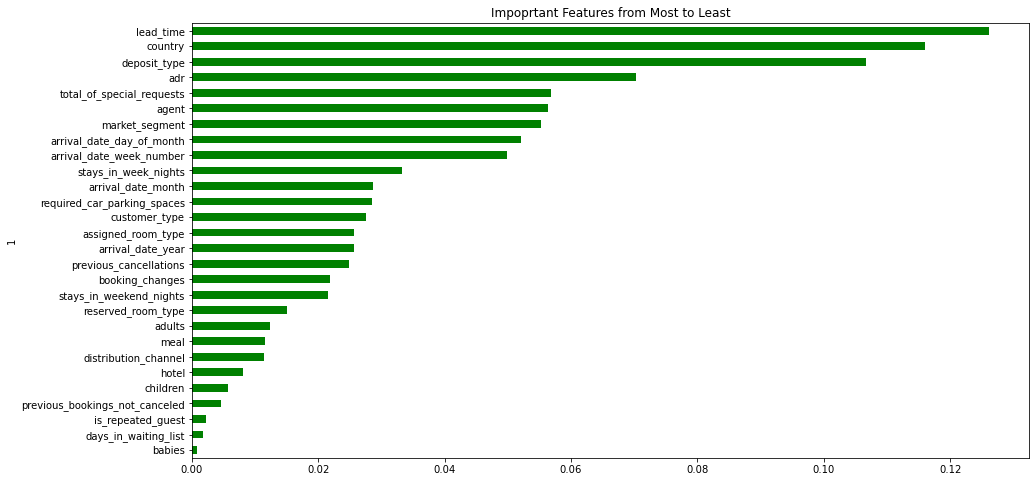

In [22]:
# Display the model's important features for review
importances_df = pd.DataFrame(sorted(zip(train_brfc.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Important Features'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Important Features')
importances_sorted.plot(kind='barh', color='green', title='Impoprtant Features from Most to Least', legend=False, figsize=(15,8))

# Model 2: LogisticRegression

In [23]:
# Train model & fit with the LogisticRegression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs', random_state=1)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

In [24]:
# Make "target" predictions using the testing data
predictions_lr = lr_model.predict(X_test_scaled)

In [25]:
# Calculate the accuracy score - this is significantly less than Model, so we will end the analysis here
lr_acc = accuracy_score(y_test, predictions_lr)
lr_acc

0.7966697936210131

In [26]:
# Review the classification report
from imblearn.metrics import classification_report_imbalanced

print("LogisticRegression Model Report")
print(classification_report_imbalanced(y_test, predictions_lr))

LogisticRegression Model Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.79      0.92      0.59      0.85      0.73      0.56     18853
          1       0.81      0.59      0.92      0.68      0.73      0.52     10995

avg / total       0.80      0.80      0.71      0.79      0.73      0.54     29848



# Model 3: EasyEnsembleClassifier

In [27]:
# Train model & fit with the EasyEnsembleClassifier model
from imblearn.ensemble import EasyEnsembleClassifier
eec_model = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec_model.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=100, random_state=1)

In [28]:
# Make "target" predictions using the testing data
predictions_eec = eec_model.predict(X_test_scaled) 

In [29]:
# Review accuracy using the "balanced accuracy score" - this is significantly less than Model, so we will end the analysis here
from sklearn.metrics import balanced_accuracy_score
eec_acc = balanced_accuracy_score(y_test, predictions_eec)
eec_acc

0.824316620485913

In [32]:
# Review the classification report

print('EasyEnsembleClassifier Model Report')
print(classification_report_imbalanced(y_test, predictions_eec))

EasyEnsembleClassifier Model Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.88      0.85      0.80      0.86      0.82      0.68     18853
          1       0.76      0.80      0.85      0.78      0.82      0.68     10995

avg / total       0.83      0.83      0.82      0.83      0.82      0.68     29848



# Model 4: Naive Random Oversampling + BalancedRandomForestClassifier

In [53]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(random_state=1)
X_resampled_oversample, y_resampled_oversample = oversample.fit_resample(X_train, y_train)
Counter(y_resampled_oversample)

Counter({0: 56313, 1: 56313})

In [54]:
# Train the balanced random forest classifier with resampled data
train_brfc.fit(X_resampled_oversample, y_resampled_oversample)

BalancedRandomForestClassifier(random_state=1)

In [55]:
# Make target predictions
y_resampled_oversample = train_brfc.predict(X_test) 

In [56]:
# Calculated the balanced accuracy score
nro_acc = balanced_accuracy_score(y_test, y_resampled_oversample)
nro_acc

0.8841154223841445

In [63]:
# Review the classification report

print('Naive Random Oversampling + BRF Report')
print(classification_report_imbalanced(y_test, y_resampled_oversample))

Naive Random Oversampling + BRF Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.91      0.92      0.84      0.92      0.88      0.79     18853
          1       0.87      0.84      0.92      0.85      0.88      0.77     10995

avg / total       0.89      0.89      0.87      0.89      0.88      0.78     29848



# Model 5: SMOTEENN + BalancedRandomForestClassifier

In [58]:
# Resample the training data with SMOTEENN
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

Counter({0: 46779, 1: 56402})

In [59]:
# Train the balanced random forest classifier with resampled data
train_brfc.fit(X_resampled, y_resampled)

BalancedRandomForestClassifier(random_state=1)

In [60]:
# Make target predictions
y_pred = train_brfc.predict(X_test)

In [61]:
# Calculated the balanced accuracy score
smoteenn_acc = balanced_accuracy_score(y_test, y_pred)
smoteenn_acc

0.9032469998912387

In [64]:
# Review the classification report

print('SMOTEENN + BRF Report')
print(classification_report_imbalanced(y_test, y_pred))

SMOTEENN + BRF Report
                   pre       rec       spe        f1       geo       iba       sup

          0       0.94      0.91      0.90      0.92      0.90      0.82     18853
          1       0.85      0.90      0.91      0.87      0.90      0.81     10995

avg / total       0.91      0.90      0.90      0.91      0.90      0.82     29848



# Score Comparison

In [71]:
# consolidating accuracy scores for all models
print(f"BalancedRandomForestClassifier accuracy score: {brfc_acc:0.2f}")
print(f"LogisticRegression accuracy score: {lr_acc:0.2f}")
print(f"EasyEnsembleClassifier accuracy score: {eec_acc:0.2f}")
print(f"NaiveRandomOversampler accuracy score: {nro_acc:0.2f}")
print(f"SMOTEENN Oversampling accuracy score: {smoteenn_acc:0.2f}")

BalancedRandomForestClassifier accuracy score: 0.89
LogisticRegression accuracy score: 0.80
EasyEnsembleClassifier accuracy score: 0.82
NaiveRandomOversampler accuracy score: 0.88
SMOTEENN Oversampling accuracy score: 0.90


In [72]:
# Intialise data to Dicts of series.
acc_combined = {'Accuracy Score' : pd.Series([0.89, 0.80, 0.82, 0.88, 0.90],
                       index =['BalancedRandomForestClassifier', 'LogisticRegression', 'EasyEnsembleClassifier', 'NaiveRandomOversampler', 'SMOTEENN Oversampling'])}
  
# creates Dataframe.
acc_df = pd.DataFrame(acc_combined)
acc_df

,Accuracy Score
BalancedRandomForestClassifier,0.89
LogisticRegression,0.80
EasyEnsembleClassifier,0.82
NaiveRandomOversampler,0.88
SMOTEENN Oversampling,0.90


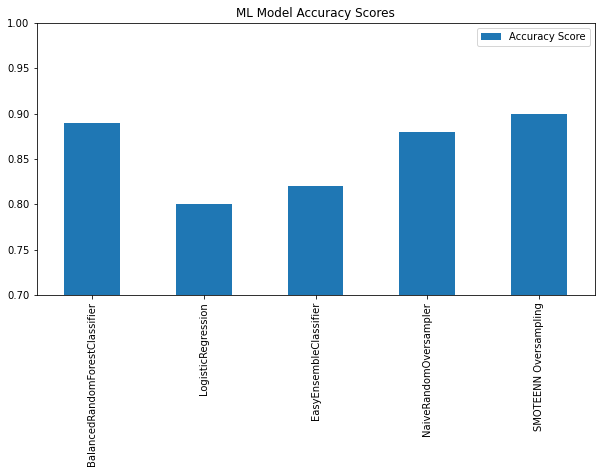

In [73]:
# Plot accuracy scores for better visual
acc_df.plot(kind='bar', figsize=(10,5), title='ML Model Accuracy Scores')
plt.ylim(0.7,1.0)
plt.show()

<AxesSubplot:xlabel='lead_time', ylabel='Density'>

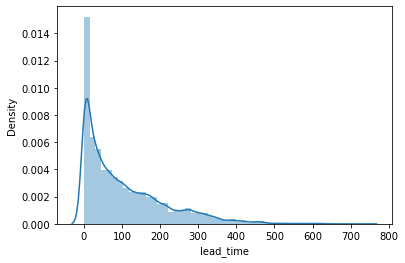

In [50]:
sns.distplot(hotel['lead_time'])

In [51]:
get_most_important_variables(hotel, ['lead_time', 'country', 'adr', 'total_of_special_requests', 'agent'], threshold_count=10, min_correlation=0.01,
                                 target_var='is_canceled')

country
             Correlation with is_canceled var_name values
country_1                        0.022369  country      1
country_5                        0.020249  country      5
country_6                       -0.010391  country      6
country_11                      -0.014817  country     11
country_12                      -0.040408  country     12
country_15                      -0.049331  country     15
country_19                      -0.010947  country     19
country_29                      -0.030974  country     29
country_31                       0.017488  country     31
country_34                      -0.037110  country     34
country_42                      -0.012110  country     42
country_43                      -0.107548  country     43
country_46                      -0.015049  country     46
country_48                      -0.010157  country     48
country_51                      -0.067178  country     51
country_54                      -0.027482  country     54
countr

,Correlation with is_canceled,var_name,values
lead_time_0,-0.148419,lead_time,0
lead_time_1,-0.099274,lead_time,1
lead_time_2,-0.073511,lead_time,2
lead_time_3,-0.069498,lead_time,3
lead_time_4,-0.066907,lead_time,4
...,...,...,...
agent_492,0.019970,agent,492
agent_495,0.022931,agent,495
agent_502,-0.010909,agent,502
agent_527,-0.013175,agent,527


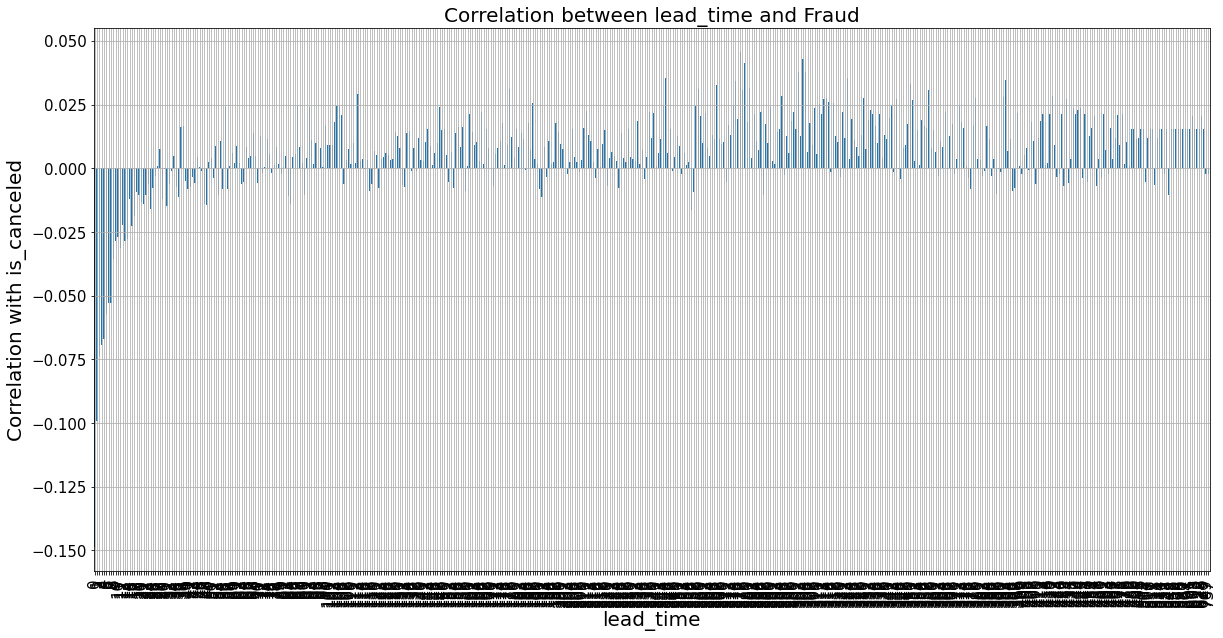

In [52]:
def plot_correlation(df, var_name):
    target_var = 'is_canceled'
    df2 = pd.get_dummies(df[[var_name, target_var]], columns=[var_name])
    x_labels = []
    labels = list(df2.columns[1:])
    for i in range(0,len(labels)):
        x_labels.append(labels[i].split('_')[-1])

    df3 = df2.corrwith(df2[target_var])[1:]
    df3.index = x_labels

    df3.plot.bar(
            figsize = (20, 10), title = "Correlation with {}".format(var_name), fontsize = 15, grid = True)
    plt.title("Correlation between {} and Fraud".format(var_name), fontsize=20)
    plt.xlabel(var_name, fontsize=20)
    plt.ylabel("Correlation with {}".format(target_var), fontsize=20)
    
plot_correlation(hotel, 'lead_time')